In [123]:
import numpy as np
import pandas as pd
import scipy.stats as st
import random
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
def RandomPermutation():  
    perm = list(range(8))  
    random.shuffle(perm)  
    return perm  
 
def StupidPermutation():  
    partialSums = [0,1,8,35,111,285,  
        628,1230,2191,3606,5546,8039,11056,14506,18242,  
        22078,25814,29264,32281,34774,36714,38129,39090,  
        39692,40035,40209,40285,40312,40319,40320]  
    r = random.randint(0, partialSums[-1])  
    numInv = 0  
    while partialSums[numInv] < r:  
        numInv += 1
    
    perm = list(range(8))  
    for step in range(numInv):  
        t1 = random.randint(0, 7)  
        t2 = random.randint(0, 7)  
        perm[t1], perm[t2] = perm[t2], perm[t1]  
    return perm

In [213]:
def sample(size, method):
    methods = {'random': RandomPermutation, 'stupid': StupidPermutation}
    sampler = methods[method]
    
    samples = []
    for _ in range(size):
        perm = ''.join(map(str, sampler()))
        samples.append(perm)
    
    return samples

def num_pos_matrix(samples):
    a = np.zeros((8, 8), dtype=np.int)
    for i in range(len(samples)):
        sample = samples[i]
        for j in range(8):
            number = int(sample[j])
            position = j
            a[number][position] += 1
    
    return a

In [174]:
ss = sample(100000, 'stupid')
rs = sample(100000, 'random')

In [214]:
a = num_pos_matrix(ss)
a

array([[14745, 12078, 12162, 12140, 12202, 12192, 12250, 12231],
       [12222, 14641, 11969, 12220, 12353, 12268, 12018, 12309],
       [12227, 12274, 14737, 12054, 12259, 12090, 12321, 12038],
       [12092, 12255, 12244, 14720, 12080, 12257, 12139, 12213],
       [12393, 12157, 12131, 12216, 14686, 12197, 12209, 12011],
       [12105, 12090, 12235, 12331, 12195, 14781, 12075, 12188],
       [12100, 12309, 12257, 12073, 12114, 12030, 14955, 12162],
       [12116, 12196, 12265, 12246, 12111, 12185, 12033, 14848]])

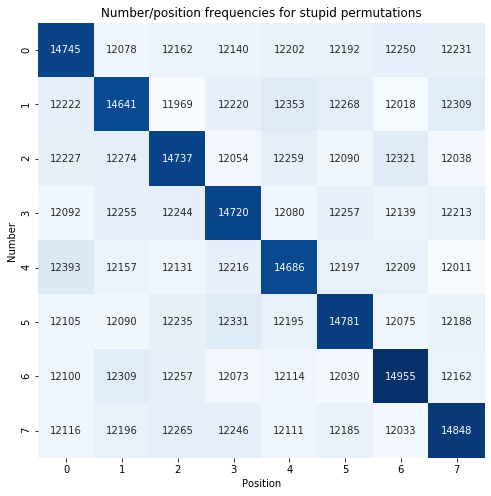

In [237]:
plt.figure(figsize=(8, 8))
sns.heatmap(a, annot=True, fmt='', cbar=False, cmap='Blues')
plt.xlabel('Position')
plt.ylabel('Number')
plt.title('Number/position frequencies for stupid permutations');

In [227]:
b = num_pos_matrix(rs)

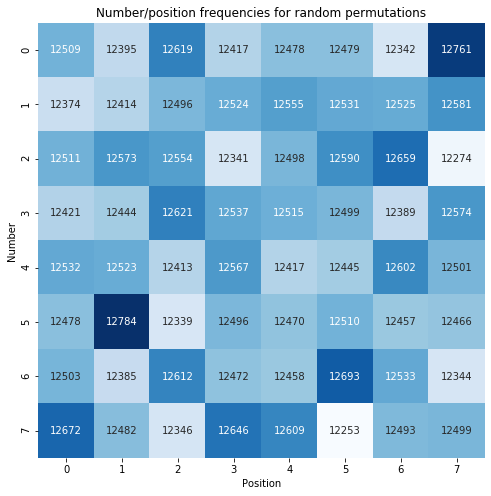

In [238]:
plt.figure(figsize=(8, 8))
sns.heatmap(b, annot=True, fmt='', cbar=False, cmap='Blues')
plt.xlabel('Position')
plt.ylabel('Number')
plt.title('Number/position frequencies for random permutations');

In [179]:
pd.Series(ss).value_counts()[:10]

01234567    14
01254367    13
21534067    12
21435067    11
41523067    11
62034517    11
01237564    11
01235467    11
10246537    10
53014267    10
dtype: int64

In [122]:
np.math.factorial(8)

40320

In [201]:
result = []
with open('data/permutations.in') as file:
    n = int(file.readline())
    for i in range(n):
        perms = []
        count = 0
        for _ in range(1000):
            perm = ''.join(file.readline().split())
            perms.append(perm)
            for j in range(8):
                if int(perm[j]) == j:
                    count += 1
                
        diag = np.diag(num_pos_matrix(perms))
        print(diag, diag.mean()/1000, count)
        result.append([i, diag.mean()/1000, count])

result.sort(key=lambda x: x[1])

[123. 133. 134. 119. 129. 121. 139. 124.] 0.12775 1022
[154. 142. 131. 145. 143. 155. 150. 126.] 0.14325 1146
[131. 126. 133. 129. 130. 125. 100. 128.] 0.12525 1002
[139. 103. 134. 113. 133. 115. 127. 134.] 0.12475 998
[127. 135. 135. 127. 125. 136. 119. 133.] 0.129625 1037
[119. 121. 118. 145. 132. 130. 132. 135.] 0.129 1032
[129. 128. 128. 102. 108. 130. 129. 113.] 0.120875 967
[149. 152. 157. 161. 148. 132. 149. 144.] 0.149 1192
[148. 156. 149. 140. 145. 139. 161. 133.] 0.146375 1171
[143. 147. 143. 119. 148. 151. 154. 141.] 0.14325 1146
[126. 145. 125. 122. 129. 131. 138. 126.] 0.13025 1042
[138. 138. 155. 138. 131. 156. 159. 133.] 0.1435 1148
[149. 143. 149. 152. 144. 156. 165. 159.] 0.152125 1217
[160. 140. 159. 163. 163. 130. 129. 154.] 0.14975 1198
[124. 125. 116. 128. 102. 124. 119. 115.] 0.119125 953
[133. 129. 127. 144. 105. 121. 140. 117.] 0.127 1016
[126. 132. 143. 144. 139. 137. 137. 143.] 0.137625 1101
[114. 123. 136. 138. 127. 129. 122. 139.] 0.1285 1028
[156. 140. 125.

[137. 151. 164. 147. 160. 154. 163. 139.] 0.151875 1215
[140. 169. 149. 142. 141. 150. 164. 153.] 0.151 1208
[125. 144. 129. 132. 142. 123. 123. 126.] 0.1305 1044
[119. 124. 113. 114. 110. 114. 145. 110.] 0.118625 949
[151. 157. 141. 148. 169. 158. 133. 156.] 0.151625 1213
[122. 136. 117. 113. 127. 112.  98. 108.] 0.116625 933
[154. 135. 141. 157. 156. 156. 165. 174.] 0.15475 1238
[141. 147. 139. 130. 150. 151. 141. 160.] 0.144875 1159
[113. 132. 136. 100. 125. 119. 131. 122.] 0.12225 978
[135. 117. 126. 134. 132. 143. 116. 114.] 0.127125 1017
[147. 145. 162. 133. 149. 165. 153. 151.] 0.150625 1205
[116. 116. 134. 117. 120. 136. 116. 134.] 0.123625 989
[151. 151. 171. 149. 148. 147. 149. 152.] 0.15225 1218
[112. 127. 125. 119. 109. 112. 121. 122.] 0.118375 947
[133. 127. 132. 148. 126. 110. 123. 133.] 0.129 1032
[134. 106. 124. 137. 119. 115. 126. 131.] 0.124 992
[134. 155. 158. 140. 171. 164. 149. 137.] 0.151 1208
[112. 134. 122. 130. 136. 142. 122. 111.] 0.126125 1009
[172. 136. 172.

In [204]:
pd.Series(np.array(result)[:, 0]).astype(int).to_csv('data/permutations.out', header=False, index=False)